This notebook creates the graphs seen in the Results section of the thesis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import json
%matplotlib inline

In [2]:
# Update plot parameters for publication
def update(factor=0.9):
    # Set figure size
    WIDTH = 462.35 # the number (in pt) latex spits out when typing: \the\textwidth
    FACTOR = factor  # the fraction of the width you'd like the figure to occupy
    fig_width_pt = WIDTH * FACTOR

    inches_per_pt = 1.0 / 72.27
    golden_ratio = (np.sqrt(5) - 1.0) / 2.0  # because it looks good

    fig_width_in = fig_width_pt * inches_per_pt  # figure width in inches
    fig_height_in = fig_width_in * golden_ratio  # figure height in inches
    fig_dims = [fig_width_in, fig_height_in]  # fig dims as a list

    # Update rcParams for figure size
    params = {
        'font.size': 9.0,
        'text.usetex': False,
        # 'font.family': 'serif',
        # 'font.serif': 'cm',
        'savefig.dpi': 600,
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight',
        'figure.figsize': fig_dims,
    }
    plt.rcParams.update(params)
    
update()

### Load the data and prepara df for easier analysis

In [18]:
# Path to files
PATH="."

In [19]:
# Read in film metadata
dataset = pd.read_pickle(f"{PATH}/dataset.pkl")

# Handle data type interpretations
dataset = dataset.infer_objects()
dataset["ID"] = pd.to_numeric(dataset["ID"])
dataset["Year"] = pd.to_numeric(dataset["Year"])
dataset["Metacritic Rating"] = pd.to_numeric(dataset["Metacritic Rating"])
dataset["Domestic Box-Office Gross [million USD]"] = pd.to_numeric(dataset["Domestic Box-Office Gross [million USD]"])
dataset["Character Style"] = dataset["Character Style"].apply(lambda x: list(x.split(",")))

# View data
print(f"Length: {len(dataset)}")
dataset.head()

Length: 145


,Film,ID,Studio,Year,Sequel To,Character Style,Animation Style,Protagonist Gender,available or downloaded,in dataset,classification train/ test,Bechdel Test,Budget [million USD],Domestic Box-Office Gross [million USD],Metacritic Rating,Analysed,# Frames,Comments
1,Incredibles 2,69.0,Pixar,2018,44,[human],3D,female,D,disney_2000-present,,3/3,,608.6,80.0,,12997,
2,Frozen 2,72.0,Disney,2019,60,[human],3D,female,D,,,3/3,,477.4,64.0,,10887,
3,Fantasia,NaN,Disney,1940,,"[animal, humanoid]","2D,3D",,D,,,,,NaN,NaN,,,Live-action/animation hybrid
4,The Reluctant Dragon,NaN,Disney,1041,,[],"2D,3D",,,,,,,NaN,NaN,,,Live-action/animation hybrid
5,Dumbo,3.0,Disney,1941,,[animal],2D,male,D,disney_det_tes,train,2/3,,1.6,98.0,Y,7430,


In [20]:
# Read aggregated data from all films
filename = f"{PATH}/films.json" 
with open(filename,'r') as f:
  file_data = json.load(f)
df_analysis = pd.json_normalize(file_data["films"])

# View data
print(f"Length: {len(df_analysis)}")
df_analysis.head()

Length: 76


,id,sample,num_females,num_males,percent_females,percent_males,num_bbox_m_female,num_bbox_l_female,num_bbox_m_male,num_bbox_l_male,...,top_90percent_combinations_count,top_90percent_combinations_percent,num_0_females,num_1_female,num_2_females,num_3+_females,percent_0_females,percent_1_female,percent_2_females,percent_3+_females
0,38,monsters-inc-disneyscreencaps.com-5782.jpg,3591,16974,0.17,0.83,1217,2374,4378,12596,...,"[2656, 2031, 937, 811, 600, 584, 330, 266]","[0.29, 0.22, 0.1, 0.09, 0.07, 0.06, 0.04, 0.03]",5954,2261,0,0,0.65,0.25,0.00,0.0
1,48,ratatouille-disneyscreencaps.com-2476.jpg,4122,15953,0.21,0.79,1048,3074,3431,12522,...,"[4657, 2141, 1191, 848, 471, 450]","[0.43, 0.2, 0.11, 0.08, 0.04, 0.04]",7248,2510,0,0,0.66,0.23,0.00,0.0
2,5,make-mine-music-disneyscreencaps.com-1752.jpg,2174,6362,0.25,0.75,1136,1038,3921,2441,...,"[1837, 946, 707, 391, 331, 138]","[0.37, 0.19, 0.14, 0.08, 0.07, 0.03]",3013,1337,0,0,0.61,0.27,0.00,0.0
3,22,oliver-co-disneyscreencaps.com-2453.jpg,3813,12276,0.24,0.76,818,2995,3173,9103,...,"[2377, 1343, 786, 739, 546, 415, 225, 187, 156]","[0.31, 0.18, 0.1, 0.1, 0.07, 0.05, 0.03, 0.02,...",4422,2127,225,0,0.59,0.28,0.03,0.0
4,68,coco-disneyscreencaps.com-2900.jpg,9666,17514,0.36,0.64,4640,5026,7089,10425,...,"[2630, 1846, 1296, 844, 616, 447, 362, 341, 28...","[0.25, 0.18, 0.12, 0.08, 0.06, 0.04, 0.03, 0.0...",5092,3169,1056,0,0.49,0.30,0.10,0.0


In [21]:
# Left merge dataframes - only keep metadata for films in films.json
df = df_analysis.merge(dataset, how='left', left_on='id', right_on='ID')

# View data
print(f"Length: {len(df)}")
df.head()

Length: 76


,id,sample,num_females,num_males,percent_females,percent_males,num_bbox_m_female,num_bbox_l_female,num_bbox_m_male,num_bbox_l_male,...,available or downloaded,in dataset,classification train/ test,Bechdel Test,Budget [million USD],Domestic Box-Office Gross [million USD],Metacritic Rating,Analysed,# Frames,Comments
0,38,monsters-inc-disneyscreencaps.com-5782.jpg,3591,16974,0.17,0.83,1217,2374,4378,12596,...,D,"disney_det_test, disney_2000-present",train,1/3,,289.9,79.0,Y,10113,
1,48,ratatouille-disneyscreencaps.com-2476.jpg,4122,15953,0.21,0.79,1048,3074,3431,12522,...,D,"disney_det_test, disney_2000-present",train,1/3,,206.4,96.0,Y,12471,
2,5,make-mine-music-disneyscreencaps.com-1752.jpg,2174,6362,0.25,0.75,1136,1038,3921,2441,...,D,disney_det_test,train,1/3,,NaN,60.0,Y,7092,
3,22,oliver-co-disneyscreencaps.com-2453.jpg,3813,12276,0.24,0.76,818,2995,3173,9103,...,D,disney_det_test,train,2/3,,74.2,58.0,Y,8205,
4,68,coco-disneyscreencaps.com-2900.jpg,9666,17514,0.36,0.64,4640,5026,7089,10425,...,D,"disney_det_test, disney_2000-present",train,3/3,,209.7,81.0,Y,11277,


In [23]:
# Get film ID according to character style
def get_i_list(df, char_style_arr=["human", "humanoid", "animal", "machine"], inclusivity="any"):
  i_list = []
  char_styles = char_style_arr
  if inclusivity == "all":
    for index, row in df.iterrows():
      if all(item in char_styles for item in row["Character Style"]):
        i_list.append(index)
  elif inclusivity == "any":
    for index, row in df.iterrows():
      if any(item in char_styles for item in row["Character Style"]):
        i_list.append(index)
  return i_list

# Get ID of human or humanoid films
i_list = get_i_list(df, char_style_arr=["human", "humanoid"], inclusivity="any")
print(f"Film IDs: {len(i_list)}: {i_list}")

# Filter df for human or humanoid films
human_df = df[df.index.isin(i_list)]
human_df = human_df.sort_values(by=['Year', 'id'])

Film IDs: 51: [0, 1, 2, 4, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 42, 44, 45, 46, 47, 49, 51, 53, 54, 57, 58, 62, 63, 64, 67, 68, 70, 71, 72, 73, 75]


In [24]:
# Determine colour (pink/ blue) based on protagonist gender
def set_dot_colors(pro_gender):
  colors = []
  for item in pro_gender:
    if item == "female":
      colors.append("hotpink")
    elif item == "male":
      colors.append("cornflowerblue")
    else:
      colors.append("yellow")
  return np.array(colors)

# Create colour column in df
human_df["colors"] = set_dot_colors(human_df["Protagonist Gender"])

### FFR per film

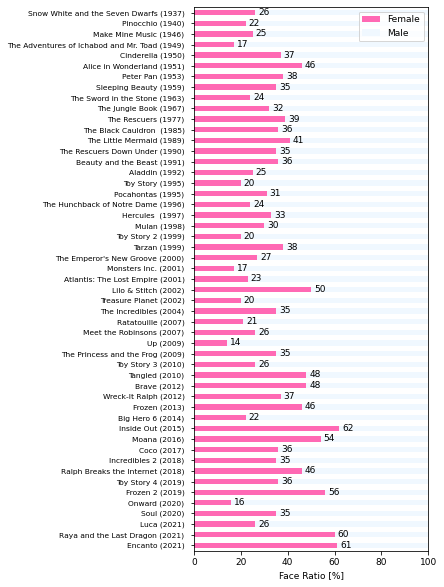

In [25]:
# Data
female = np.array(human_df["percent_females"]*100)
male = np.array(human_df["percent_males"]*100)
index = list(human_df["Film"] + " (" + human_df["Year"].astype(str) + ") ")
# Plot
plot = pd.DataFrame({'Female': female, 'Male': male}, index=index)
ax = plot.plot.barh(stacked=True, color=['hotpink', 'aliceblue'], figsize=[4.2, 10]) # Note axis ticks are not accounted for in figsize!
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')
# Format
plt.xlim(0, 100)
plt.xlabel('Face Ratio [%]')
plt.yticks(fontsize='small')
plt.gca().invert_yaxis()
#plt.savefig("FvM_films.pdf")
plt.show()

In [26]:
# Overall mean and stddev
all_list = human_df["percent_females"]*100
print(f"Overall Mean: {all_list.mean()}, Overall StdDev {all_list.std()}")

Overall Mean: 33.88235294117647, Overall StdDev 12.217441727012297


In [27]:
# Overall mean and stddev by gender
f = human_df[human_df["Protagonist Gender"] == "female"]["percent_females"]
m = human_df[human_df["Protagonist Gender"] == "male"]["percent_females"]
print(f"FEMALE... Mean: {f.mean()}, Std: {f.std()}")
print(f"MALE... Mean: {m.mean()}, Std: {m.std()}")

FEMALE... Mean: 0.44052631578947365, Std: 0.11162803730895877
MALE... Mean: 0.2784375, Std: 0.08207429266298329


### FFR per time period (e.g. decade)

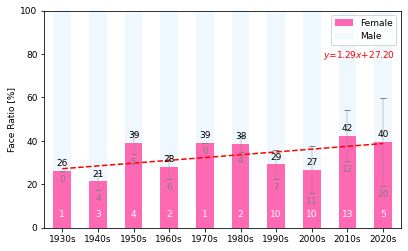

In [28]:
# Bins
bins = list(range(1929, 2039, 10)) # decade
year_list = [f"{year+1}s" for year in bins]

# # custom (Maz et al.)
# bins = [1936, 1984, 1998, 2013, 2019, 2025]
# year_list = ["1937-1984", "1985-1998", "1999-2013", "2014-2019", "2020-present", "future"]

# # custom
# bins = [1936, 1989, 2009, 2025]
# year_list = ["1937-1989", "1990-2009", "2010-present", "future"]

# Data
groups = human_df.groupby(pd.cut(human_df.Year, bins))
# groups = human_df[human_df["Protagonist Gender"] == "male"].groupby(pd.cut(human_df[human_df["Protagonist Gender"] == "male"].Year, bins))
# groups = human_df[human_df["Protagonist Gender"] == "female"].groupby(pd.cut(human_df[human_df["Protagonist Gender"] == "female"].Year, bins))
group_size = list(groups.size())
grouped = groups.mean()
female = list(grouped["percent_females"]*100)
male = list(grouped["percent_males"]*100)
index = year_list[:-1]
stddev = groups["percent_females"].std()*100
stddev = stddev.astype(object).replace(np.nan, 0) # replace NaN with None

# Plot
update()
plot = pd.DataFrame({'Female': female, 'Male': male}, index=index)
ax = plot.plot.bar(stacked=True, color=['hotpink', 'aliceblue'])
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')
# Add group size in center of bar
for i, v in enumerate(group_size):
  plt.text(i, v*0+5, str(int(v)), fontsize='medium', color="white", ha='center')
# Add errorbar
plt.errorbar(index, female, yerr=stddev, linestyle='None', color='grey', capsize=3, elinewidth=0.4)
# Add error bar values
for i, v in enumerate(zip(stddev, female)):
  plt.text(i, v[1]-v[0]-5, "{:.0f}".format(v[0]), fontsize='medium', color="grey", ha='center')

# Calculate equation for trendline
x_num = [i for i in range(len(index))] #bc can't have categorical x-axis
z = np.polyfit(x_num, female, 1)
p = np.poly1d(z)
plt.plot(x_num,p(x_num),"r--")
# Add equation
plt.annotate(r"$y$=%.2f$x$+%.2f"%(z[0],z[1]), (7.3,78), color="red")

# Format
plt.xticks(rotation=0)
plt.ylim(0, 100)
# plt.xlabel('Film release decade')
plt.ylabel('Face Ratio [%]')
plt.legend(loc='upper right')
# plt.rcParams['ytick.labelsize'] = 'small'
plt.tight_layout()
# plt.savefig("FvM_decade_std.pdf")
plt.rcParams['ytick.labelsize'] = 'medium'
plt.show()

In [29]:
# Mean and stddev by bin
print(f"FEMALE... Mean: {female},\n Std: {stddev}")

FEMALE... Mean: [26.0, 21.333333333333336, 39.0, 28.000000000000004, 39.0, 38.5, 29.2, 26.8, 42.46153846153845, 39.6],
 Std: Year
(1929, 1939]     0.000000
(1939, 1949]     4.041452
(1949, 1959]     4.830459
(1959, 1969]     5.656854
(1969, 1979]     0.000000
(1979, 1989]     3.535534
(1989, 1999]     6.579429
(1999, 2009]    10.685400
(2009, 2019]    11.701961
(2019, 2029]    20.231164
Name: percent_females, dtype: float64


### FFR of sequels

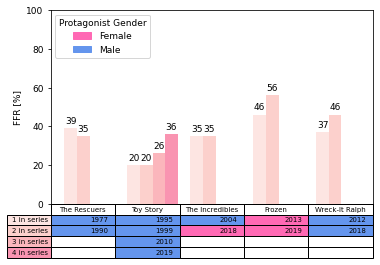

In [30]:
# Franchiese
columns = ["The Rescuers","Toy Story","The Incredibles","Frozen","Wreck-It Ralph"] 
g1 = ["The Rescuers", "The Rescuers Down Under"]
g2 = ["Toy Story", "Toy Story 2", "Toy Story 3", "Toy Story 4"]
g3 = ["The Incredibles", "Incredibles 2"]
g4 = ["Frozen", "Frozen 2"]
g5 = ["Wreck-It Ralph", "Ralph Breaks the Internet"]

# Trim dataframe
g = g1 + g2 + g3 + g4 + g5
df_TM = human_df[human_df["Film"].isin(g)].sort_values(by=["Year"])[["Film", "percent_females", "percent_males", "Year", "Protagonist Gender"]]

# Update series information
yr = []
gender = []
df_TM["Series"] = [""]*len(df_TM)
for i, j in zip([g1, g2, g3, g4, g5], columns):
  df_TM.loc[df["Film"].isin(i), "Series"] = j
  yr.append(df_TM.loc[df_TM["Film"].isin(i), "Year"].astype(str).to_list())
  gender.append(df_TM.loc[df_TM["Film"].isin(i), "Protagonist Gender"].astype(str).to_list())

# Array to store data
data = np.zeros([4,5]) # y = series number, x = series group
for ix, i in enumerate(columns):
  for j,k in enumerate(df_TM[df_TM["Series"] == i]["percent_females"]):
    data[j,ix] = k*100
data[data == 0] = np.nan

x = np.arange(len(columns))  # the column label locations
width = 0.2  # the width of the bars

update(factor=1)
fig, ax = plt.subplots()
rows = ['%d in series' % x for x in (1, 2, 3, 4)]
# colors = plt.cm.tab20b([15, 14, 13, 12]) 
colors = plt.cm.RdPu(np.linspace(0.1, 0.4, len(rows)))
# colors = plt.cm.bone(np.linspace(0.4, 0.8, len(rows))[::-1])
for row in range(4):
  rects = ax.bar(x + width*(row-1.5), data[row,:], width, label=str(row+1), color=colors[row])
  ax.bar_label(rects, padding=3)

import itertools
cell_text = list(map(list, itertools.zip_longest(*yr, fillvalue=None)))

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Colour cells based on gender
for i in range(4):
  for j in range(5):
    cell = the_table[i+1,j]
    if cell.get_text().get_text() != "":
      g = gender[j][i]
      if g == "male":
        cell.set(facecolor='cornflowerblue')
        # cell.get_text().set_text("male " + cell.get_text().get_text())
      else:
        cell.set(facecolor='hotpink')
        # cell.get_text().set_text("female " + cell.get_text().get_text())

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

# Override legend to show gender colours
leg = plt.legend(["Female", "Male"], title="Protagonist Gender", loc='upper left')
leg.legendHandles[0].set_color('hotpink')
leg.legendHandles[1].set_color('cornflowerblue')

# Format
ax.set_xticks(x, columns)
ax.set_ylim(0, 100)
ax.set_xlim(right=4.5)
ax.set_xticks([])
plt.ylabel('FFR [%]')
# plt.savefig(f"sequel_bar.pdf")
plt.show()

### Distribution of FFR by time period

In [34]:
# Make df for each time period
def make_df(dist):
  g = pd.DataFrame(dist)
  g["index"] = dist.index
  g = g.set_index("index")
  g = g.sort_values("index")
  return g

In [35]:
# Bins

# decades
# g30 = human_df[(human_df["Year"] >= 1930) & (human_df["Year"] < 1940)]
# g40 = human_df[(human_df["Year"] >= 1940) & (human_df["Year"] < 1950)]
# g50 = human_df[(human_df["Year"] >= 1950) & (human_df["Year"] < 1960)]
# g60 = human_df[(human_df["Year"] >= 1960) & (human_df["Year"] < 1970)]
# g70 = human_df[(human_df["Year"] >= 1970) & (human_df["Year"] < 1980)]
# g80 = human_df[(human_df["Year"] >= 1980) & (human_df["Year"] < 1990)]
# g90 = human_df[(human_df["Year"] >= 1990) & (human_df["Year"] < 2000)]
# g00 = human_df[(human_df["Year"] >= 2000) & (human_df["Year"] < 2010)]
# g10 = human_df[(human_df["Year"] >= 2010) & (human_df["Year"] < 2020)]
# g20 = human_df[(human_df["Year"] >= 2020) & (human_df["Year"] < 2030)]
# # for each decade group film into FFR bins (5% steps)
# bins = [x for x in range(0, 100, 10)]
# dist_g30 = pd.cut(g30["percent_females"]*100, bins).value_counts()
# dist_g40 = pd.cut(g40["percent_females"]*100, bins).value_counts()
# dist_g50 = pd.cut(g50["percent_females"]*100, bins).value_counts()
# dist_g60 = pd.cut(g60["percent_females"]*100, bins).value_counts()
# dist_g70 = pd.cut(g70["percent_females"]*100, bins).value_counts()
# dist_g80 = pd.cut(g80["percent_females"]*100, bins).value_counts()
# dist_g90 = pd.cut(g90["percent_females"]*100, bins).value_counts()
# dist_g00 = pd.cut(g00["percent_females"]*100, bins).value_counts()
# dist_g10 = pd.cut(g10["percent_females"]*100, bins).value_counts()
# dist_g20 = pd.cut(g20["percent_females"]*100, bins).value_counts()
# # make df
# df_dist_g30 = make_df(dist_g30)
# df_dist_g40 = make_df(dist_g40)
# df_dist_g50 = make_df(dist_g50)
# df_dist_g60 = make_df(dist_g60)
# df_dist_g70 = make_df(dist_g70)
# df_dist_g80 = make_df(dist_g80)
# df_dist_g90 = make_df(dist_g90)
# df_dist_g00 = make_df(dist_g00)
# df_dist_g10 = make_df(dist_g10)
# df_dist_g20 = make_df(dist_g20)

# half-century
g1 = human_df[(human_df["Year"] >= 1900) & (human_df["Year"] < 1950)]
g2 = human_df[(human_df["Year"] >= 1950) & (human_df["Year"] < 2000)]
g3 = human_df[(human_df["Year"] >= 2000) & (human_df["Year"] < 2050)]
bins = [x for x in range(0, 100, 10)]
dist_g1 = pd.cut(g1["percent_females"]*100, bins).value_counts()
dist_g2= pd.cut(g2["percent_females"]*100, bins).value_counts()
dist_g3 = pd.cut(g3["percent_females"]*100, bins).value_counts()
df_dist_g1 = make_df(dist_g1)
df_dist_g2 = make_df(dist_g2)
df_dist_g3 = make_df(dist_g3)

# # quarter-century
# g1 = human_df[(human_df["Year"] >= 1925) & (human_df["Year"] < 1950)]
# g2 = human_df[(human_df["Year"] >= 1950) & (human_df["Year"] < 1975)]
# g3 = human_df[(human_df["Year"] >= 1975) & (human_df["Year"] < 2000)]
# g4 = human_df[(human_df["Year"] >= 2000) & (human_df["Year"] < 2025)]
# # quarter-century
# bins = [x for x in range(0, 100, 10)]
# dist_g1 = pd.cut(g1["percent_females"]*100, bins).value_counts()
# dist_g2= pd.cut(g2["percent_females"]*100, bins).value_counts()
# dist_g3 = pd.cut(g3["percent_females"]*100, bins).value_counts()
# dist_g4 = pd.cut(g4["percent_females"]*100, bins).value_counts()
# # quarter-century
# df_dist_g1 = make_df(dist_g1)
# df_dist_g2 = make_df(dist_g2)
# df_dist_g3 = make_df(dist_g3)
# df_dist_g4 = make_df(dist_g4)

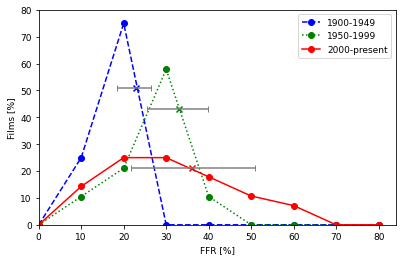

In [36]:
# Plot
plt.figure()

# # decade (too messy)
# plt.plot(bins[:-1], df_dist_g30["percent_females"]/df_dist_g30["percent_females"].sum()*100, label='1930s')
# plt.plot(bins[:-1], df_dist_g40["percent_females"]/df_dist_g40["percent_females"].sum()*100, label='1940s')
# plt.plot(bins[:-1], df_dist_g50["percent_females"]/df_dist_g50["percent_females"].sum()*100, label='1950s')
# plt.plot(bins[:-1], df_dist_g60["percent_females"]/df_dist_g60["percent_females"].sum()*100, label='1960s')
# plt.plot(bins[:-1], df_dist_g70["percent_females"]/df_dist_g70["percent_females"].sum()*100, label='1970s')
# plt.plot(bins[:-1], df_dist_g80["percent_females"]/df_dist_g80["percent_females"].sum()*100, label='1980s')
# plt.plot(bins[:-1], df_dist_g90["percent_females"]/df_dist_g90["percent_females"].sum()*100, label='1990s')
# plt.plot(bins[:-1], df_dist_g00["percent_females"]/df_dist_g00["percent_females"].sum()*100, label='2000s')
# plt.plot(bins[:-1], df_dist_g10["percent_females"]/df_dist_g10["percent_females"].sum()*100, label='2010s')
# plt.plot(bins[:-1], df_dist_g20["percent_females"]/df_dist_g20["percent_females"].sum()*100, label='2020s')

# half-century
plt.plot(bins[:-1], df_dist_g1["percent_females"]/df_dist_g1["percent_females"].sum()*100, '--bo', label='1900-1949')
plt.scatter(23, 51, marker='x', color="b")
#plt.text(25, 53, str(23), fontsize='medium', color="blue", ha='center') # best not to include because looks like it refers to the y-value
plt.plot(bins[:-1], df_dist_g2["percent_females"]/df_dist_g2["percent_females"].sum()*100, ':go', label='1950-1999')
plt.scatter(33, 43, marker='x', color="g")
#plt.text(35, 45, str(33), fontsize='medium', color="green", ha='center')
plt.plot(bins[:-1], df_dist_g3["percent_females"]/df_dist_g3["percent_females"].sum()*100, '-ro', label='2000-present')
plt.scatter(36, 21, marker='x', color="r")
#plt.text(38, 23, str(36), fontsize='medium', color="red", ha='center')
# StdDev
bins = [1899, 1949, 1999, 2049]
year_list = ["1900-1949", "1950-1999", "2000-present", "future"]
groups = human_df.groupby(pd.cut(human_df.Year, bins))
stddev = groups["percent_females"].std()*100
# Add error bar
plt.errorbar(groups["percent_females"].mean()*100, [51,43,21], xerr=stddev, linestyle='None', color='grey', capsize=3)
# # Add error bar values
# for v in zip(groups["percent_females"].mean()*100, stddev, [51,43,21]):
#   plt.text(v[0]+v[1]+2, v[2]-1, str(int(v[1])), fontsize='medium', color="grey", ha='center')

# # quarter-century
# plt.plot(bins[:-1], df_dist_g1["percent_females"]/df_dist_g1["percent_females"].sum()*100, '--bo', label='1925-1949')
# plt.scatter(22, 58, marker='x', color="b")
# plt.plot(bins[:-1], df_dist_g2["percent_females"]/df_dist_g2["percent_females"].sum()*100, '--go', label='1950-1974')
# plt.scatter(35, 41, marker='x', color="g")
# plt.plot(bins[:-1], df_dist_g3["percent_females"]/df_dist_g3["percent_females"].sum()*100, '--ro', label='1975-1999')
# plt.scatter(32, 45, marker='x', color="r")
# plt.plot(bins[:-1], df_dist_g4["percent_females"]/df_dist_g4["percent_females"].sum()*100, '--yo', label='2000-present')
# plt.scatter(35, 21, marker='x', color="y")

# Format
plt.xlabel('FFR [%]')
plt.ylabel('Films [%]')
plt.legend()
plt.xlim(left=0)
plt.ylim(0, 80)
# plt.savefig("distFFR_50years.pdf")
plt.show()

In [39]:
# Mean and stddev of each period
mean = groups["percent_females"].mean()*100
print(f"Means:\n{mean}, StdDevs:\n{stddev}")

Means:
Year
(1899, 1949]    22.500000
(1949, 1999]    32.631579
(1999, 2049]    36.357143
Name: percent_females, dtype: float64, StdDevs:
Year
(1899, 1949]     4.041452
(1949, 1999]     7.212724
(1999, 2049]    14.603942
Name: percent_females, dtype: float64


In [40]:
# Details of 2000-present
df_dist_g3["percent_females"]/df_dist_g3["percent_females"].sum()*100

index
(0, 10]      0.000000
(10, 20]    14.285714
(20, 30]    25.000000
(30, 40]    25.000000
(40, 50]    17.857143
(50, 60]    10.714286
(60, 70]     7.142857
(70, 80]     0.000000
(80, 90]     0.000000
Name: percent_females, dtype: float64

### Bechdel test

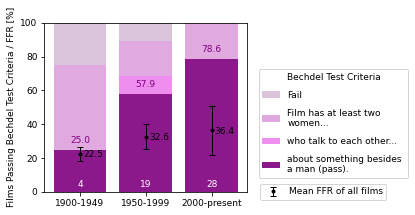

In [41]:
# being weird when trying to read cell values, so gotta create bt as below
bt = pd.DataFrame(data = {
    "Film": human_df["Film"], 
    "Studio": human_df["Studio"], 
    "Year": [int(x) for x in human_df["Year"]], 
    "Bechdel Test": human_df["Bechdel Test"], 
    "Character Style": human_df["Character Style"], 
    "Animation Sytle": human_df["Animation Style"],
    "Protagonist Gender": human_df["Protagonist Gender"]
    })
options = ["Disney", "Pixar"]
bt = bt.loc[bt["Studio"].isin(options)].reset_index(drop=True)

# Bin: Half-century
bins = [1900, 1949, 1999, 2049]
years = ["1900-1949", "1950-1999", "2000-present"] 

# Group
groups = bt.groupby(['Bechdel Test', pd.cut(bt.Year, bins)])
bt_results = groups.size().unstack()
column_names = list(bt_results.columns.values)
bt_results_percent = pd.DataFrame()
for x in column_names:
  bt_results_percent[f"{x} percent"] = bt_results[x] /  bt_results[x].sum()
bt3 = bt_results_percent.iloc[0]*100
bt2 = bt_results_percent.iloc[1]*100
bt1 = bt_results_percent.iloc[2]*100
bt0 = bt_results_percent.iloc[3]*100

# Plot
update(0.8)
fig, ax = plt.subplots()
# BT
ax.bar(years, bt3, bottom=bt0+bt1+bt2, label='Fail', alpha=0.9, color="thistle")
ax.bar(years, bt2, bottom=bt0+bt1, label='Film has at least two \nwomen...', alpha=0.9, color="plum")
ax.bar(years, bt1, bottom=bt0, label='who talk to each other...', alpha=0.9, color="violet")
bars = ax.bar(years, bt0, label='about something besides \na man (pass).', alpha=0.9, color="purple")
ax.bar_label(bars, padding=5, fmt="%.1f", label_type='edge', color="purple")
# Format
fig.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), labelspacing=1, title='Bechdel Test Criteria')
fig.tight_layout()
fig.subplots_adjust(right=0.75)

# FFR
groups = human_df.groupby(pd.cut(human_df.Year, bins))
stddev = groups["percent_females"].std()*100
er = ax.errorbar(years, groups["percent_females"].mean()*100, yerr=stddev, fmt='.', linestyle='none', color='black', capsize=3, elinewidth=1, label="Mean FFR of all films")
for i, v in enumerate(groups["percent_females"].mean()*100):
  ax.text(i+0.2, v-2, "{:.1f}".format(v), fontsize='medium', color="black", ha='center')
fig.legend(handles=[er], loc='center right', bbox_to_anchor=(1.14, 0.2))
# Add group size in center of bar
groups_size = list(bt_results.sum(axis=0))
for i, v in enumerate(groups_size):
  ax.text(i, 3, str(v), fontsize='medium', color="white", ha='center')
# Format
plt.subplots_adjust(left=0.2, bottom=0.2) # Adjust layout to make room for the table

# Format
ax.set_ylabel("Films Passing Bechdel Test Criteria / FFR [%]")
# plt.savefig("bt_pass_withMean.pdf")
plt.show()

### Comparison to Kagan

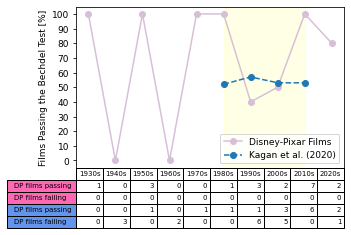

In [43]:
# being weird when trying to read cell values, so gotta create bt as below
dataframe = human_df
bt = pd.DataFrame(data = {
    "Film": dataframe["Film"], 
    "Studio": dataframe["Studio"], 
    "Year": [int(x) for x in dataframe["Year"]], 
    "Bechdel Test": dataframe["Bechdel Test"], 
    "Character Style": dataframe["Character Style"], 
    "Animation Sytle": dataframe["Animation Style"],
    "Protagonist Gender": dataframe["Protagonist Gender"]
    })
options = ["Disney", "Pixar"]
bt = bt.loc[bt["Studio"].isin(options)].reset_index(drop=True)

# Bins: decade
bins = [1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2029]
years = [f"{year+1}s" for year in bins[:-1]]

# Group
groups = bt.groupby(['Bechdel Test', pd.cut(bt.Year, bins)])
bt_results = groups.size().unstack()
column_names = list(bt_results.columns.values)
count_films_pass = []
count_films_fail = []
rowLabels=["Films that passed", "Films that failed"]
bt_results_percent = pd.DataFrame()
for x in column_names:
  count_films_pass.append(bt_results[x][3])
  count_films_fail.append(bt_results[x].sum() - bt_results[x][3])
  bt_results_percent[f"{x} percent"] = bt_results[x] /  bt_results[x].sum()
y = bt_results_percent.iloc[3]*100
y_kagan = [None, None, None, None, None, 52, 57, 53, 53, None] 

# Add a table at the bottom of the axes
# # All
# count_f_pass = [1,0,3,0,1,1,3,3,8,2]
# count_f_fail = [0,0,1,0,0,0,0,0,0,0]
# count_m_pass = [0,0,1,1,2,1,2,5,8,2]
# count_m_fail = [0,3,0,2,1,3,7,10,2,1]
# Human-Humanoid
count_f_pass = [1,0,3,0,0,1,3,2,7,2]
count_f_fail = [0,0,0,0,0,0,0,0,0,0]
count_m_pass = [0,0,1,0,1,1,1,3,6,2]
count_m_fail = [0,3,0,2,0,0,6,5,0,1]
rowLabels = ["DP films passing", "DP films failing", "DP films passing", "DP films failing"]
colors = ["hotpink", "hotpink", "cornflowerblue", "cornflowerblue"]
the_table = plt.table(cellText=[count_f_pass, count_f_fail, count_m_pass, count_m_fail],
                      rowLabels=rowLabels,
                      rowColours=colors,
                      colLabels=years,
                      loc='bottom')

# Format
update(0.75)
plt.axvspan(5, 8, color='yellow', alpha=0.1) # highlight area
plt.plot(years, y, label="Disney-Pixar Films", color="thistle", marker="o")
plt.plot(years, y_kagan, "--o", label="Kagan et al. (2020)")
plt.yticks([tick for tick in range(0,110,10)])
# plt.xlabel('Film Release Decade')
plt.xticks([])
plt.ylabel('Films Passing the Bechdel Test [%]')
plt.legend()
# plt.savefig("bt_pass_kagan.pdf")
plt.show()

### FFR segmented by protagonist gender (scatter plot)

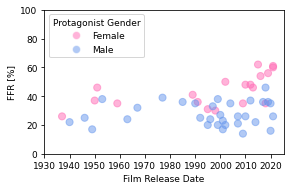

In [44]:
update(factor=0.67)

# Split df into pro_f, pro_m
pro_f = human_df.loc[human_df["Protagonist Gender"] == "female"]
pro_m = human_df.loc[human_df["Protagonist Gender"] == "male"]
# Data
y1 = pro_f["percent_females"]*100 
y2 = pro_m["percent_females"]*100 
x1 = pro_f["Year"]
x2 = pro_m["Year"]
colors1 = set_dot_colors(list(pro_f["Protagonist Gender"])) # pink
colors2 = set_dot_colors(list(pro_m["Protagonist Gender"])) # blue
area = 50

# Plot
plt.figure()
plt.scatter(x1, y1, s=area, c=colors1, alpha=0.5)
plt.scatter(x2, y2, s=area, c=colors2, alpha=0.5)

# Format
plt.xticks(np.arange(1930, 2030, 10))
plt.ylim([0, 100])
# Create legend
legend_elements = [
    Line2D([0], [0], marker='o', color="white", markerfacecolor='hotpink', label='Scatter', markersize=8, alpha=0.5),
    Line2D([0], [0], marker='o', color="white", markerfacecolor='cornflowerblue', label='Scatter', markersize=8, alpha=0.5)
    ]
plt.legend(legend_elements, ["Female", "Male"], title="Protagonist Gender", loc='upper left')
plt.xlabel('Film Release Date')
plt.ylabel('FFR [%]')
# plt.savefig("FFR_scatter_trendlines.pdf")
plt.show()

In [46]:
# FFR mean by protagonist gender
print("MALE... ", pro_m["percent_females"].mean())
print("FEMALE... ", pro_f["percent_females"].mean())
print("TOTAL... ", human_df["percent_females"].mean())

MALE...  0.2784375
FEMALE...  0.44052631578947365
TOTAL...  0.33882352941176475


### FFR of female-protagonist films with trendline

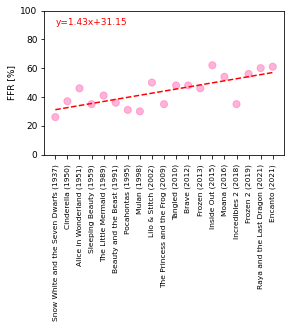

In [47]:
update(factor=0.67)

# Split df into pro_f, pro_m
pro_f = human_df.loc[human_df["Protagonist Gender"] == "female"]
pro_m = human_df.loc[human_df["Protagonist Gender"] == "male"]
# Data
y1 = pro_f["percent_females"]*100 
y2 = pro_m["percent_females"]*100 
x1 = pro_f["Film"] + " (" + pro_f["Year"].astype(str) + ") "
x2 = pro_m["Film"]
colors1 = set_dot_colors(pro_f["Protagonist Gender"]) # pink
colors2 = set_dot_colors(pro_m["Protagonist Gender"]) # blue
area = 50

# Plot
plt.figure()
plt.scatter(x1, y1, s=area, c=colors1, alpha=0.5)
# Trendline
x1_num = [i for i in range(len(x1))] #bc can't have categorical x-axis
z1 = np.polyfit(x1_num, y1, 1)
p = np.poly1d(z1)
plt.plot(x1_num,p(x1_num),"r--")
plt.annotate("y=%.2fx+%.2f"%(z1[0],z1[1]), (0,90), color="red")

# Format
plt.ylim([0, 100])
plt.xticks(rotation=90, fontsize='small')
plt.ylabel('FFR [%]')
#plt.savefig("FFR_scatter_female.pdf")
plt.show() 

### Box-Office by protagonist gender

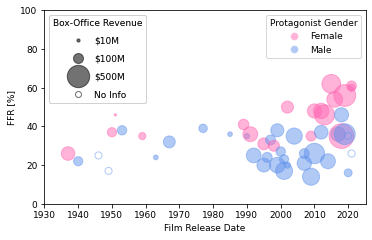

In [49]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
from audioop import add
update(factor=0.9)

# Data
y = human_df["percent_females"]*100 # % females
x = human_df["Year"]
c = set_dot_colors(list(human_df["Protagonist Gender"]))
s = human_df["Domestic Box-Office Gross [million USD]"]

# Plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c, s=s, alpha=0.5)
# Add the missing films
ax.scatter(1946, 25, s=50, facecolors='none', edgecolors="cornflowerblue", alpha=0.5) # Make Mine Music
ax.scatter(1949, 17, s=50, facecolors='none', edgecolors="cornflowerblue", alpha=0.5) # Ichabod Toad
ax.scatter(2020, 35, s=50, facecolors='none', edgecolors="cornflowerblue", alpha=0.5) # Soul
ax.scatter(2021, 26, s=50, facecolors='none', edgecolors="cornflowerblue", alpha=0.5) # Luca

# Add legend gender
legend_elements = [
    Line2D([], [], marker='o', color="white", markerfacecolor='hotpink', markersize=8, alpha=0.5),
    Line2D([], [], marker='o', color="white", markerfacecolor='cornflowerblue', markersize=8, alpha=0.5),
    ]
legend1 = ax.legend(legend_elements, ["Female", "Male"], loc='upper right', title="Protagonist Gender")
ax.add_artist(legend1)
# Add legend box-office
legend_elements = [
    Line2D([], [], marker='o', color="none", markerfacecolor='black', markersize=np.sqrt(10), alpha=0.5), # area s = markersize^2 so take sqrt
    Line2D([], [], marker='o', color="none", markerfacecolor='black', markersize=np.sqrt(100), alpha=0.5),
    Line2D([], [], marker='o', color="none", markerfacecolor='black', markersize=np.sqrt(500), alpha=0.5),
    Line2D([], [], marker='o', color="white", markeredgecolor="black", markerfacecolor='none', markersize=6, alpha=0.5),
    ]
legend2 = ax.legend(legend_elements, ["$10M","$100M","$500M", "No Info"], loc='upper left', title="Box-Office Revenue", labelspacing=1)
ax.add_artist(legend2)

# Format
ax.set_xticks(np.arange(1930, 2030, 10))
ax.set_ylim([0, 100])
plt.xlabel('Film Release Date')
plt.ylabel('FFR [%]')
# plt.savefig("FFR_revenue.pdf")
plt.show()

### Studio by protagonist gender

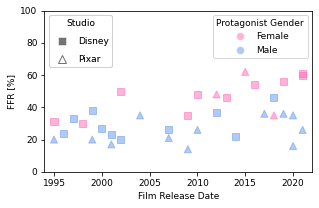

In [50]:
update(factor=0.75)

# Data
y = human_df["percent_females"]*100 # % females
x = human_df["Year"]
colors = human_df["colors"] 
area = 50

# Plot
fig, ax = plt.subplots()
# get index of all Disney films
i = np.array(human_df[human_df["Studio"] == "Disney"].index)
scatter = ax.scatter(x[i], y[i], s=area, c=colors[i], alpha=0.5, marker="s")
# get index of all Pixar films
i = np.array(human_df[human_df["Studio"] == "Pixar"].index)
plt.scatter(x[i], y[i], s=area, c=colors[i], alpha=0.5, marker="^")

# Add legend gender
legend_elements = [
    Line2D([0], [0], marker='o', color="white", markerfacecolor='hotpink', label='Scatter', markersize=8, alpha=0.5),
    Line2D([0], [0], marker='o', color="white", markerfacecolor='cornflowerblue', label='Scatter', markersize=8, alpha=0.5),
    ]
legend1 = ax.legend(legend_elements, ["Female", "Male"], loc='upper right', title="Protagonist Gender")
ax.add_artist(legend1)
# Add legend studio
legend_elements = [
    Line2D([0], [0], marker='s', color="white", markerfacecolor='black', label='Scatter', markersize=8, alpha=0.5),
    Line2D([0], [0], marker='^', color="white", markeredgecolor="black", markerfacecolor='none', label='Scatter', markersize=8, alpha=0.5),
    ]
legend2 = ax.legend(legend_elements, ["Disney", "Pixar"], loc='upper left', title="Studio", labelspacing=1)
ax.add_artist(legend2)

# Format
plt.ylim([0, 100])
plt.xlim([1994, 2022])
#plt.xticks(np.arange(1990, 2030, 10))
plt.xlabel('Time')
plt.ylabel('FFR [%]')
plt.xlabel('Film Release Date')
# plt.savefig("FFR_studio.pdf")
plt.show()

### FFR vs large-face FFR

 
1.137 x - 4.122


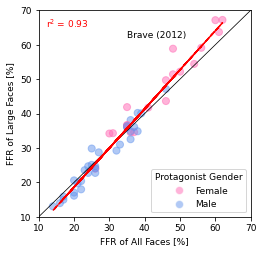

In [ ]:
from sklearn.metrics import r2_score

# Data
all_l_faces = human_df['num_bbox_l_female'] + human_df['num_bbox_l_male']
x = human_df["percent_females"]*100
y = human_df["num_bbox_l_female"].div(all_l_faces)*100
c = human_df["colors"]
area = 50

# Plot
plt.figure(figsize=(3.8,3.8))
plt.plot(np.arange(0,100,10), np.arange(0,100,10), color="black", lw=0.75) # line through middle
plt.scatter(x, y, s=area, c=c, alpha=0.5)
# Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"--r")
print(p)

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color="white", markerfacecolor='hotpink', label='Scatter', markersize=8, alpha=0.5),
    Line2D([0], [0], marker='o', color="white", markerfacecolor='cornflowerblue', label='Scatter', markersize=8, alpha=0.5)
    ]
plt.legend(legend_elements, ["Female", "Male"], loc='lower right', title="Protagonist Gender")

# Format
plt.annotate("r$^2$ = {:.2f}".format(r2_score(x, y)), (12, 65), color='red')
plt.annotate("Brave (2012)", (35, 62))
plt.xlim([10,70])
plt.ylim([10,70])
plt.xlabel('FFR of All Faces [%]')
plt.ylabel('FFR of Large Faces [%]')
# plt.savefig("FFR_largeFaces_labelled.pdf")
plt.show()

### Large-face FFR difference to FFR

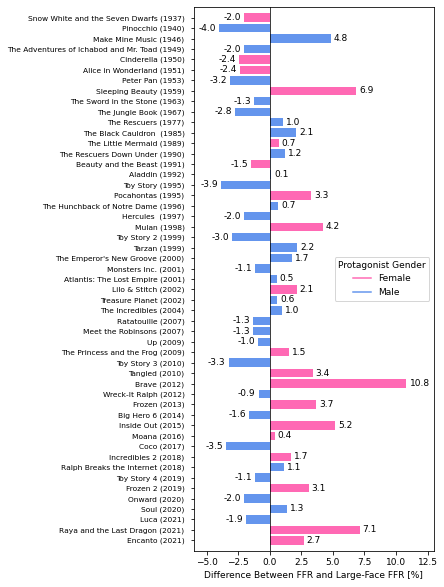

In [51]:
# Data
# Calulate % LARGE faces f/m out of all LARGE faces
all_l_faces = human_df['num_bbox_l_female'] + human_df['num_bbox_l_male']
percent_females_L = human_df["num_bbox_l_female"] / all_l_faces
difference = (percent_females_L - human_df["percent_females"])*100
labels = human_df["Film"] + " (" + human_df["Year"].astype(str) + ") "
colors = human_df["colors"]

# Plot
fig, ax = plt.subplots(figsize=[4.3, 10])
bars = ax.barh(labels, difference, color=colors)
ax.bar_label(bars, padding=3, fmt='%.1f')

# Legend
legend_elements = [
    Line2D([0], [0], color="hotpink", markersize=8),
    Line2D([0], [0], color="cornflowerblue", markersize=8)
    ]
plt.legend(legend_elements, ["Female", "Male"], title="Protagonist Gender", loc="center right")

# Format
plt.axvline(0, color='black', lw=0.75)
plt.xlim(-6, 13)
plt.ylim(-1 ,51)
plt.yticks(fontsize='small')
plt.gca().invert_yaxis()
plt.xlabel('Difference Between FFR and Large-Face FFR [%]')
# plt.savefig("FFR_difference.pdf")
plt.show()

### Character combinations

In [52]:
combinations = human_df["top_90percent_combinations_labels"].sum()
counts = human_df["top_90percent_combinations_count"].sum()
combi = pd.DataFrame({"top_90percent_combinations_labels": combinations, "top_90percent_combinations_count": counts})
combi = combi.groupby(by=["top_90percent_combinations_labels"]).sum()
combi.sort_values(by=["top_90percent_combinations_count"], ascending=False, inplace=True)
combi["percent"] = combi["top_90percent_combinations_count"]/combi["top_90percent_combinations_count"].sum()
combi["cumulative_percent"] = combi['percent'].cumsum()

# View data (90% of character combinations)
combi

,top_90percent_combinations_count,percent,cumulative_percent
top_90percent_combinations_labels,,,
0 female(s) & 1 male(s),132249,0.321628,0.321628
1 female(s) & 0 male(s),73425,0.178569,0.500197
0 female(s) & 2 male(s),64179,0.156083,0.656280
1 female(s) & 1 male(s),60888,0.148079,0.804359
1 female(s) & 2 male(s),20669,0.050267,0.854625
2 female(s) & 0 male(s),17922,0.043586,0.898212
0 female(s) & 3 male(s),17244,0.041937,0.940149
2 female(s) & 1 male(s),9116,0.022170,0.962319
1 female(s) & 3 male(s),4763,0.011584,0.973902


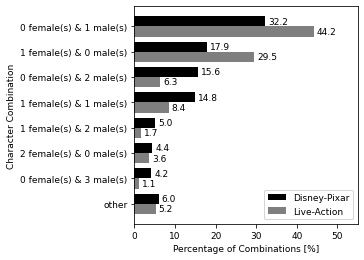

In [53]:
# Data
x = [item["percent"]*100 for index, item in combi.iterrows() if item["cumulative_percent"] <= 0.95]
y = list(combi.index.values[:len(x)])
other_list = [item["percent"]*100 for index, item in combi.iterrows() if item["cumulative_percent"] > 0.95]
other = sum(other_list)
x.append(other)
y.append("other")
# Values from Maz et al
x2 = [44.2, 29.5, 6.3, 8.4, 1.7, 3.6, 1.1, 5.2] # 1m, 1f, 2m, 1f1m, 1f2m, 2f, 3m
barHeight = 0.4

# Set position of bar on Y axis
br1 = np.arange(len(y))
br2 = [y + barHeight for y in br1]

# Plot
fig, ax = plt.subplots(figsize=(4,4))
bars = ax.barh(br1, x, align='center', color="black", height=barHeight, label="Disney-Pixar")
ax.bar_label(bars, padding=3, fmt='%.1f')
bars = ax.barh(br2, x2, align='center', color="black", alpha=0.5, height=barHeight, label="Live-Action")
ax.bar_label(bars, padding=3, fmt='%.1f')

# Format
plt.gca().invert_yaxis()
plt.yticks([r + barHeight/2 for r in range(len(y))], y) # add labels to y-axis
plt.xlim([0, 55])
plt.xlabel('Percentage of Combinations [%]')
plt.ylabel('Character Combination')
plt.legend()
# plt.savefig("combinations_by_gender.pdf")
plt.show()

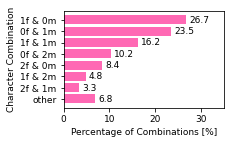

In [54]:
# Female-protagonist film combinations
# Combinations
pro_f = human_df[human_df["Protagonist Gender"] == "female"]
combinations = pro_f["top_90percent_combinations_labels"].sum()
counts = pro_f["top_90percent_combinations_count"].sum()
combi = pd.DataFrame({"top_90percent_combinations_labels": combinations, "top_90percent_combinations_count": counts})
combi = combi.groupby(by=["top_90percent_combinations_labels"]).sum()
combi.sort_values(by=["top_90percent_combinations_count"], ascending=False, inplace=True)
combi["percent"] = combi["top_90percent_combinations_count"]/combi["top_90percent_combinations_count"].sum()
combi["cumulative_percent"] = combi['percent'].cumsum()

# Data
x = [item["percent"]*100 for index, item in combi.iterrows() if item["cumulative_percent"] <= 0.95]
y = list(combi.index.values[:len(x)])
other_list = [item["percent"]*100 for index, item in combi.iterrows() if item["cumulative_percent"] > 0.95]
other = sum(other_list)
x.append(other)
y.append("other")
y = [i.replace(" female(s)", "f").replace(" male(s)", "m") for i in y]

# Plot
update(0.45)
fig, ax = plt.subplots()
bars = ax.barh(y, x, align='center', color="hotpink")
ax.bar_label(bars, padding=3, fmt='%.1f')

# Format
plt.gca().invert_yaxis()
plt.xlim([0, 35])
plt.xlabel('Percentage of Combinations [%]')
plt.ylabel('Character Combination')
# plt.savefig("combinations_f_films.pdf")
plt.show()

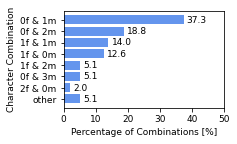

In [55]:
# Male-protagonist film combinations
# Combinations
pro_m = human_df[human_df["Protagonist Gender"] == "male"]
combinations = pro_m["top_90percent_combinations_labels"].sum()
counts = pro_m["top_90percent_combinations_count"].sum()
combi = pd.DataFrame({"top_90percent_combinations_labels": combinations, "top_90percent_combinations_count": counts})
combi = combi.groupby(by=["top_90percent_combinations_labels"]).sum()
combi.sort_values(by=["top_90percent_combinations_count"], ascending=False, inplace=True)
combi["percent"] = combi["top_90percent_combinations_count"]/combi["top_90percent_combinations_count"].sum()
combi["cumulative_percent"] = combi['percent'].cumsum()

# Data
x = [item["percent"]*100 for index, item in combi.iterrows() if item["cumulative_percent"] <= 0.95]
y = list(combi.index.values[:len(x)])
other_list = [item["percent"]*100 for index, item in combi.iterrows() if item["cumulative_percent"] > 0.95]
other = sum(other_list)
x.append(other)
y.append("other")
y = [i.replace(" female(s)", "f").replace(" male(s)", "m") for i in y]

# Plot
update(0.45)
fig, ax = plt.subplots()
bars = ax.barh(y, x, align='center', color="cornflowerblue")
ax.bar_label(bars, padding=3, fmt='%.1f')

# Format
plt.gca().invert_yaxis()
plt.xlim([0, 50])
plt.xlabel('Percentage of Combinations [%]')
plt.ylabel('Character Combination')
# plt.savefig("combinations_m_films.pdf")
plt.show()

### Combinations over times

In [56]:
# Combinations
f0 = human_df["num_0_females"]
f1 = human_df["num_1_female"]
f2 = human_df["num_2_females"]
f3 = human_df["num_3+_females"]
combi = human_df[["Year","num_0_females","num_1_female","num_2_females","num_3+_females"]]

# Bins: decade
bins = [x for x in range(1929, 2039, 10)]
year_list = [f"{year+1}s" for year in bins]

# Group
combi_binned = combi.groupby(pd.cut(combi.Year, bins)).mean()
combi_binned["total_frames"] = combi_binned.sum(axis=1)

# View groups
combi_binned

,Year,num_0_females,num_1_female,num_2_females,num_3+_females,total_frames
Year,,,,,,
"(1929, 1939]",1937.000000,4233.000000,3320.000000,539.000000,0.0,10029.000000
"(1939, 1949]",1945.000000,4604.333333,1631.666667,0.000000,0.0,8181.000000
"(1949, 1959]",1953.250000,3390.750000,3088.750000,579.750000,0.0,9012.500000
"(1959, 1969]",1965.000000,4663.000000,2691.500000,152.000000,0.0,9471.500000
"(1969, 1979]",1977.000000,3071.000000,3382.000000,402.000000,0.0,8832.000000
"(1979, 1989]",1987.000000,3446.000000,3186.500000,408.000000,0.0,9027.500000
"(1989, 1999]",1995.200000,4539.500000,2898.400000,364.100000,0.0,9797.200000
"(1999, 2009]",2004.200000,5414.100000,2710.000000,249.600000,19.9,10397.800000
"(2009, 2019]",2014.846154,3572.615385,3997.538462,1075.461538,119.0,10779.461538


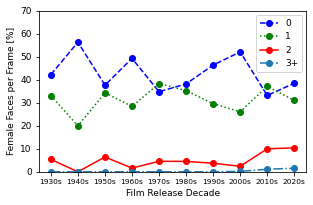

In [57]:
# Plot
update(factor=0.75)
plt.figure()
plt.plot(year_list[:-1], combi_binned["num_0_females"]/combi_binned["total_frames"]*100, '--bo', label='0')
plt.plot(year_list[:-1], combi_binned["num_1_female"]/combi_binned["total_frames"]*100, ':go', label='1')
plt.plot(year_list[:-1], combi_binned["num_2_females"]/combi_binned["total_frames"]*100, '-ro', label='2')
plt.plot(year_list[:-1], combi_binned["num_3+_females"]/combi_binned["total_frames"]*100, '-.o', label='3+')
# Format
plt.xlabel('Film Release Decade')
plt.ylabel('Female Faces per Frame [%]')
plt.ylim(0, 70)
plt.legend()
plt.xticks(fontsize='small')
# plt.savefig("Fs_per_frame.pdf")
plt.show()

### Top-10 characters

In [58]:
# Load data
characters_df = pd.read_pickle(f"{PATH}/characters_df.pkl")
print(f"Length: {len(characters_df)}")
characters_df.head()

Length: 770


,Film_ID,Film_Name,Character_ID,Character_Name,Gender,Protagonist_Antagonist
1,1,Snow White and the Seven Dwarfs,1,Snow White,female,P
2,1,Snow White and the Seven Dwarfs,2,Doc,male,
3,1,Snow White and the Seven Dwarfs,3,Witch,female,
4,1,Snow White and the Seven Dwarfs,4,Queen,female,A
5,1,Snow White and the Seven Dwarfs,5,Huntsman,male,


In [59]:
# For each film, put gender of top-10 characters in a list
gender_list = characters_df.groupby("Film_ID")["Gender"].agg(list)
# Fix data type
top10_list = []
for i, lst in zip(gender_list.index, gender_list):
  if len(lst) != 10:
    # check that correct amount of top-10 roles
    print(f"Error in {i}: {lst}")
  temp = [str(item) for item in lst]
  top10_list.append(temp)

# Fs in top 1, 3, 5, 10
top1_fs = [lst[:1].count("female") for lst in top10_list]
top3_fs = [lst[:3].count("female") for lst in top10_list]
top5_fs = [lst[:5].count("female") for lst in top10_list]
top10_fs = [lst.count("female") for lst in top10_list]

# protagonist and antagonist list
pa_list = characters_df.groupby("Film_ID")["Protagonist_Antagonist"].agg(list)
# fix datatype and get gender
a_list = []
for i, lst in zip(pa_list.index, pa_list):
  temp = [str(item) for item in lst]
  try:
    index = temp.index("A")
    a_list.append(gender_list[i][index])
  except:
    # no antagonist
    a_list.append("")

# View data
new_df = pd.DataFrame({"Film_ID": characters_df["Film_ID"].unique(), "rank_top_10": top10_list, "count_female_top1": top1_fs, "count_female_top3": top3_fs, "count_female_top5": top5_fs, "count_female_top10": top10_fs, "Antagonist Gender": a_list})
new_df.head()

,Film_ID,rank_top_10,count_female_top1,count_female_top3,count_female_top5,count_female_top10,Antagonist Gender
0,1,"[female, male, female, female, male, male, mal...",1,2,3,3,female
1,2,"[male, male, female, male, male, male, male, m...",0,1,1,1,male
2,3,"[male, male, female, female, male, male, male,...",0,1,2,4,
3,4,"[male, male, male, male, male, male, female, f...",0,0,0,4,
4,5,"[male, male, male, male, male, male, female, m...",0,0,0,2,


In [60]:
# Merge wih df containing film metadata

# rank_df = df.merge(new_df, how='left', left_on='ID', right_on='Film_ID') # all
rank_df = human_df.merge(new_df, how='left', left_on='ID', right_on='Film_ID') # human-humanoid

In [61]:
# Bins

# decade
bins = [1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2029] 
year_list = [f"{year+1}s" for year in bins]

# # half-century
# bins = [1899, 1949, 1999, 2049]
# year_list = ["1900-1949", "1950-1999", "2000-present", "future"]

# # quarter-century
# bins = [1924, 1949, 1974, 1999, 2024]
# year_list = [f"{year+1}-{year+25}" for year in bins]

# Group
groups = rank_df.groupby(pd.cut(rank_df.Year, bins))
grouped = groups.sum()
group_size = np.array(groups.size().astype(int))
print(f"Films released per bin: {group_size}")

Films released per bin: [ 1  3  4  2  1  2 10 10 13  5]


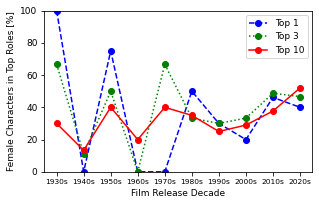

In [62]:
# Plot
update(0.75)
plt.figure()
plt.plot(year_list[:-1], grouped["count_female_top1"] / (1 * group_size)*100, '--bo', label='Top 1')
plt.plot(year_list[:-1], grouped["count_female_top3"] / (3 * group_size)*100, ':go', label='Top 3')
#plt.plot(year_list[:-1], grouped["count_female_top5"] / (5 * group_size)*100, label='Top 5')
plt.plot(year_list[:-1], grouped["count_female_top10"] / (10 * group_size)*100, '-ro', label='Top 10')

# Format
plt.xlabel('Film Release Decade')
plt.ylabel('Female Characters in Top Roles [%]')
plt.legend()
plt.xticks(fontsize='small')
plt.ylim(0, 100)
# plt.savefig("top10roles.pdf")
plt.show()

In [64]:
# Mean of bins
print("Mean:\n", grouped["count_female_top10"] / (10 * group_size)*100)
#grouped["count_female_top3"] / (3 * group_size)*100
#grouped["count_female_top1"] / (1 * group_size)*100

Mean:
 Year
(1929, 1939]    30.000000
(1939, 1949]    13.333333
(1949, 1959]    40.000000
(1959, 1969]    20.000000
(1969, 1979]    40.000000
(1979, 1989]    35.000000
(1989, 1999]    25.000000
(1999, 2009]    29.000000
(2009, 2019]    37.692308
(2019, 2029]    52.000000
Name: count_female_top10, dtype: float64


N females in film

In [65]:
# % of movies where out of top 10 roles N are female
lst = pd.DataFrame()
lst["count_films"] = rank_df["count_female_top10"].value_counts()
lst["percent"] = rank_df["count_female_top10"].value_counts() / rank_df["count_female_top10"].value_counts().sum()
lst["females_in_top10"] = lst.index
lst.sort_values(by="females_in_top10", inplace=True)

# View data
lst

,count_films,percent,females_in_top10
1,5,0.098039,1
2,11,0.215686,2
3,15,0.294118,3
4,11,0.215686,4
5,4,0.078431,5
6,4,0.078431,6
7,1,0.019608,7


<function matplotlib.pyplot.show(close=None, block=None)>

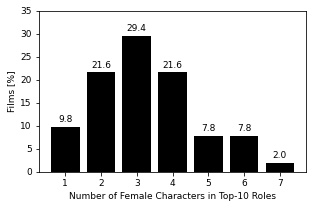

In [66]:
# Data
x = lst["females_in_top10"]
f = lst["percent"]*100
m = 100 - f
# Plot
update(0.75)
fig, ax = plt.subplots()
bars = plt.bar(x, f, label='Female', color="black")
ax.bar_label(bars, padding=3, fmt='%.1f')
# Format
plt.ylim(0, 35)
plt.xlabel('Number of Female Characters in Top-10 Roles')
plt.ylabel('Films [%]')
plt.savefig("films_with_N_fs.pdf")
plt.show

### N females in film segmented by protagonist gender

Mean # females in top-10 roles for F-protagonist films: 4.2105263157894735
Mean # females in top-10 roles for M-protagonist films: 2.71875


<function matplotlib.pyplot.show(close=None, block=None)>

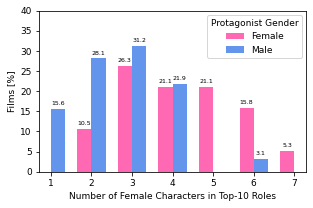

In [67]:
# F
f_pro = rank_df[rank_df["Protagonist Gender"] == "female"]
f_lst = pd.DataFrame()
f_lst["count_films"] = f_pro["count_female_top10"].value_counts()
f_lst["percent"] = f_pro["count_female_top10"].value_counts() / f_pro["count_female_top10"].value_counts().sum()
f_lst["females_in_top10"] = f_lst.index
f_lst.sort_values(by="females_in_top10", inplace=True)
# M
m_pro = rank_df[rank_df["Protagonist Gender"] == "male"]
m_lst = pd.DataFrame()
m_lst["count_films"] = m_pro["count_female_top10"].value_counts()
m_lst["percent"] = m_pro["count_female_top10"].value_counts() / m_pro["count_female_top10"].value_counts().sum()
m_lst["females_in_top10"] = m_lst.index
m_lst.sort_values(by="females_in_top10", inplace=True)
# Data
x1 = f_lst["females_in_top10"]
f1 = f_lst["percent"]*100
print(f"Mean # females in top-10 roles for F-protagonist films: {np.sum(f1/100*f1.index)}")
x2 = m_lst["females_in_top10"]
f2 = m_lst["percent"]*100
print(f"Mean # females in top-10 roles for M-protagonist films: {np.sum(f2/100*f2.index)}")

width = 0.35  # the width of the bars

# Plot
update(0.75)
fig, ax = plt.subplots()
bars = plt.bar(x1 - width/2, f1, width, label='Female', color="hotpink")
ax.bar_label(bars, padding=3, fmt='%.1f', fontsize="x-small") #fontsize="small"
bars = plt.bar(x2 + width/2, f2, width, label='Male', color="cornflowerblue")
ax.bar_label(bars, padding=3, fmt='%.1f', fontsize="x-small")

# Format
plt.legend(title="Protagonist Gender")
plt.ylim(0, 40)
plt.xlabel('Number of Female Characters in Top-10 Roles')
plt.ylabel('Films [%]')
#plt.savefig("films_with_N_fs_mf.pdf")
plt.show

### Top-10 characters segmented by protagonist gender

In [68]:
# Bin: Decade
bins = [1979, 1989, 1999, 2009, 2019, 2029] # 1929, 1939, 1949, 1959, 1969, 
year_list = [f"{year+1}s" for year in bins]

# F
groups_f = f_pro.groupby(pd.cut(f_pro.Year, bins))
grouped_f = groups_f.sum()
# how many films released that year?
group_size_f = np.array(groups_f.size().astype(int))
print(f"Group size (f-protagonist films): {group_size_f}")

# M
groups_m = m_pro.groupby(pd.cut(m_pro.Year, bins))
grouped_m = groups_m.sum()
# how many films released that year?
group_size_m = np.array(groups_m.size().astype(int))
print(f"Group size (m-protagonist films): {group_size_m}")

Group size (f-protagonist films): [1 3 2 7 2]
Group size (m-protagonist films): [1 7 8 6 3]


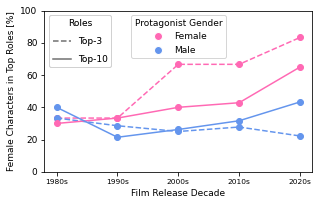

In [69]:
# Plot
update(0.75)
fig, ax = plt.subplots()
plt.plot(year_list[:-1], grouped_f["count_female_top3"] / (3 * group_size_f)*100, color="hotpink", linestyle='dashed', marker="o")
plt.plot(year_list[:-1], grouped_m["count_female_top3"] / (3 * group_size_m)*100, color="cornflowerblue", linestyle='dashed', marker="o")
plt.plot(year_list[:-1], grouped_f["count_female_top10"] / (10 * group_size_f)*100, color="hotpink", marker="o")
plt.plot(year_list[:-1], grouped_m["count_female_top10"] / (10 * group_size_m)*100, color="cornflowerblue", marker="o")

# Legend gender
legend_elements = [
    Line2D([0], [0], marker='o', color="white", markerfacecolor='hotpink', label='Scatter', markersize=8),
    Line2D([0], [0], marker='o', color="white", markerfacecolor='cornflowerblue', label='Scatter', markersize=8),
    ]
legend1 = ax.legend(legend_elements, ["Female", "Male"], loc='upper center', title="Protagonist Gender")
ax.add_artist(legend1)
# Legend top-X
legend_elements = [
    Line2D([0], [0], marker='', linestyle='dashed', color="black", label='Scatter', markersize=8, alpha=0.5),
    Line2D([0], [0], marker='', color="black", label='Scatter', markersize=8, alpha=0.5),
    ]
legend2 = ax.legend(legend_elements, ["Top-3", "Top-10"], loc='upper left', title="Roles", labelspacing=1)
ax.add_artist(legend2)

# Format
plt.xlabel('Film Release Decade')
plt.ylabel('Female Characters in Top Roles [%]')
plt.xticks(fontsize='small')
plt.ylim(0, 100)
# plt.savefig("top10_protagonistGender.pdf")
plt.show()

In [70]:
# F: Breakdown per bin
#grouped_f["count_female_top3"] / (3 * group_size_f)*100
grouped_f["count_female_top10"] / (10 * group_size_f)*100

Year
(1979, 1989]    30.000000
(1989, 1999]    33.333333
(1999, 2009]    40.000000
(2009, 2019]    42.857143
(2019, 2029]    65.000000
Name: count_female_top10, dtype: float64

In [71]:
# M: Breakdown per bin
grouped_m["count_female_top3"] / (3 * group_size_m)*100
#grouped_m["count_female_top10"] / (10 * group_size_m)*100

Year
(1979, 1989]    33.333333
(1989, 1999]    28.571429
(1999, 2009]    25.000000
(2009, 2019]    27.777778
(2019, 2029]    22.222222
Name: count_female_top3, dtype: float64

### Create Latex table from df

In [ ]:
# Film metadata
latex_table = dataset[["ID", "Film", "Year", "Studio", "Animation Style", "Character Style", "Protagonist Gender", "Bechdel Test", "Domestic Box-Office Gross [million USD]"]] 
latex_table = latex_table[latex_table["ID"].notna()]
latex_table["ID"] = latex_table["ID"].astype(int)
latex_table.set_index('ID', inplace=True)
latex_table["Domestic Box-Office Gross [million USD]"] = "$" + latex_table["Domestic Box-Office Gross [million USD]"].astype(str)
latex_table.to_latex("films.tex")

In [ ]:
# Character combinations
latex_table = combi[["top_90percent_combinations_count", "percent" ]]
latex_table.to_latex("combinations.tex")